# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Reading the data

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Looking at the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Checking for missing values

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Checking the categories in  the target variable

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Grouping by the target variable

In [7]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Feature scaling of  'Amount' 

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Dropping 'Time' column

In [10]:
df.drop(['Time'],axis=1,inplace=True)

# Checking for duplicates

In [11]:
df.duplicated().any()

True

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(275663, 30)

# Visualizing the data count in both categories of the target variable

C:\Users\ADMIN\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


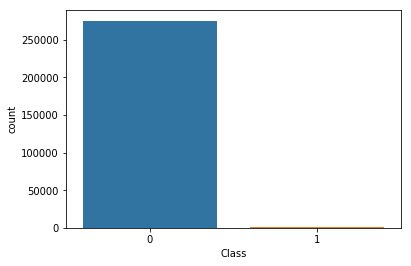

In [49]:
import seaborn as sns
sns.countplot(df['Class'])

unbalanced dataset

# Balancing the dataset

# Undersampling

# Seperating the categories

In [14]:
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [15]:
legit.shape

(275190, 30)

In [16]:
fraud.shape

(473, 30)

In [17]:
legit['Amount'].describe()

count    275190.000000
mean          0.008682
std           1.012309
min          -0.353229
25%          -0.327682
50%          -0.258275
75%          -0.033782
max         102.362243
Name: Amount, dtype: float64

In [18]:
fraud['Amount'].describe()

count    473.000000
mean       0.142021
std        1.040346
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [19]:
legitsample=legit.sample(n=473)

In [20]:
legitsample.shape

(473, 30)

In [21]:
newdf=pd.concat([legitsample,fraud],ignore_index=True)

In [22]:
newdf['Class'].value_counts()

1    473
0    473
Name: Class, dtype: int64

In [23]:
newdf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.898512,-0.507660,0.856512,1.518931,-0.372449,1.363624,-0.495014,0.427419,0.965315,-0.304007,...,-0.345689,-0.751263,-0.103210,-0.644824,0.465896,-0.496207,0.070970,0.029347,0.076525,0
1,-1.008781,-0.098033,1.528924,-1.607774,-0.108400,-0.204712,0.425106,0.155938,-1.389285,0.109844,...,-0.822368,-2.086851,0.162130,-0.439810,0.128499,0.194197,0.193932,0.115098,-0.018350,0
2,-3.131633,2.985144,1.180058,-1.969733,-0.185523,-1.294635,1.495386,-1.288601,5.094356,4.854349,...,-0.978621,-0.556996,-0.020734,0.628873,0.292672,0.560048,0.729349,-0.353849,-0.343994,0
3,1.600491,-0.555101,-1.967577,0.719394,-0.068428,-1.365005,0.547448,-0.413882,0.607074,-0.579545,...,0.338486,0.618583,-0.214414,-0.073141,0.143122,-0.122058,-0.044904,0.008041,0.587120,0
4,-0.549373,0.075677,0.308767,-0.748102,0.226920,-0.091780,0.894527,0.124519,0.085413,-1.388491,...,-0.000999,-0.340161,0.625270,0.608554,-1.137985,-0.526206,0.168526,0.277530,0.361628,0


# Storing the predictor features and the target variable in seperate variables

In [24]:
x=newdf.drop(['Class'],axis=1)
y=newdf['Class']

# Splitting the dataset into training and testing dataset

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

# Logistic Regression

In [26]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_pred=lr.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred)

0.9368421052631579

In [29]:
precision_score(y_test,y_pred)

0.9662921348314607

In [30]:
recall_score(y_test,y_pred)

0.9052631578947369

In [31]:
f1_score(y_test,y_pred)

0.9347826086956522

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
y_pred2=dt.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred2)

0.9052631578947369

In [36]:
precision_score(y_test,y_pred2)

0.9052631578947369

In [37]:
recall_score(y_test,y_pred2)

0.9052631578947369

In [38]:
f1_score(y_test,y_pred2)

0.9052631578947369

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
y_pred3=rf.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred3)

0.9210526315789473

In [43]:
precision_score(y_test,y_pred3)

0.9761904761904762

In [44]:
recall_score(y_test,y_pred3)

0.8631578947368421

In [45]:
f1_score(y_test,y_pred3)

0.9162011173184357

# Comparison

In [46]:
modelscores=pd.DataFrame({'models':['LR','DT','RF'],'Accuracy':[accuracy_score(y_test,y_pred)*100,
                          accuracy_score(y_test,y_pred2)*100,
                          accuracy_score(y_test,y_pred3)*100]})

In [47]:
modelscores

,models,Accuracy
0,LR,93.684211
1,DT,90.526316
2,RF,92.105263


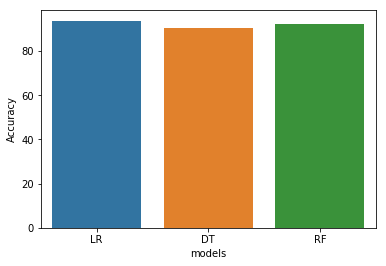

In [50]:
sns.barplot(x='models',y='Accuracy',data=modelscores)